Iteration 0, Cost: 0.6931471805599453, Accuracy: 0.37142857142857144
Iteration 100, Cost: 0.10573618627582443, Accuracy: 0.9824175824175824
Iteration 200, Cost: 0.08695358036356036, Accuracy: 0.9824175824175824
Iteration 300, Cost: 0.07863132509383397, Accuracy: 0.9824175824175824
Iteration 400, Cost: 0.07361682746896966, Accuracy: 0.9846153846153847
Iteration 500, Cost: 0.07013961872163449, Accuracy: 0.9868131868131869
Iteration 600, Cost: 0.06752669982272648, Accuracy: 0.9868131868131869
Iteration 700, Cost: 0.0654596663868135, Accuracy: 0.9868131868131869
Iteration 800, Cost: 0.06376565692816291, Accuracy: 0.9868131868131869
Iteration 900, Cost: 0.06234139874148262, Accuracy: 0.9868131868131869
Iteration 1000, Cost: 0.06112066247265558, Accuracy: 0.9868131868131869
Iteration 1100, Cost: 0.06005858226644817, Accuracy: 0.9868131868131869
Iteration 1200, Cost: 0.059123404118874456, Accuracy: 0.9868131868131869
Iteration 1300, Cost: 0.05829183278514952, Accuracy: 0.9868131868131869
Iter

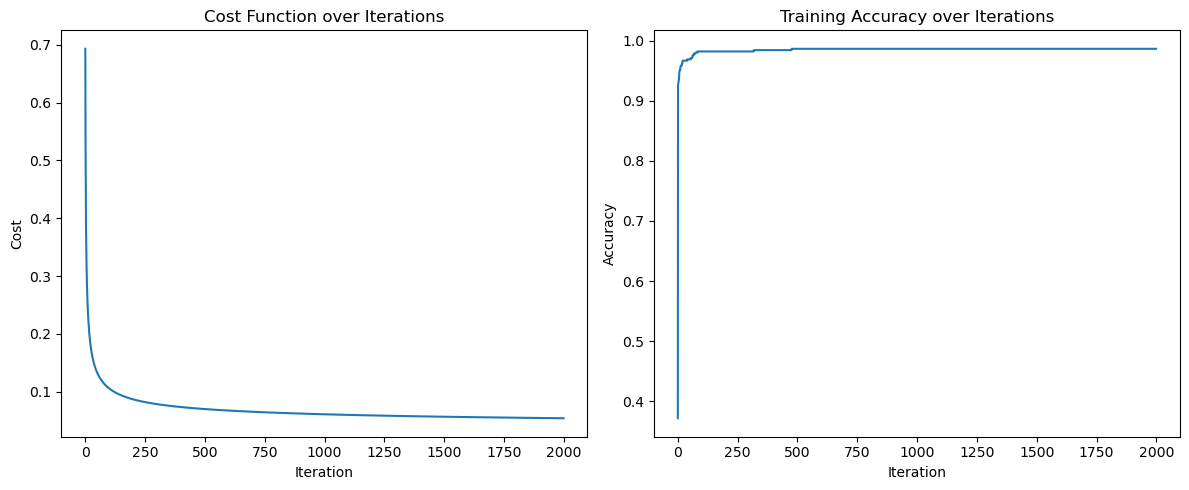

Test Accuracy: 99.12%


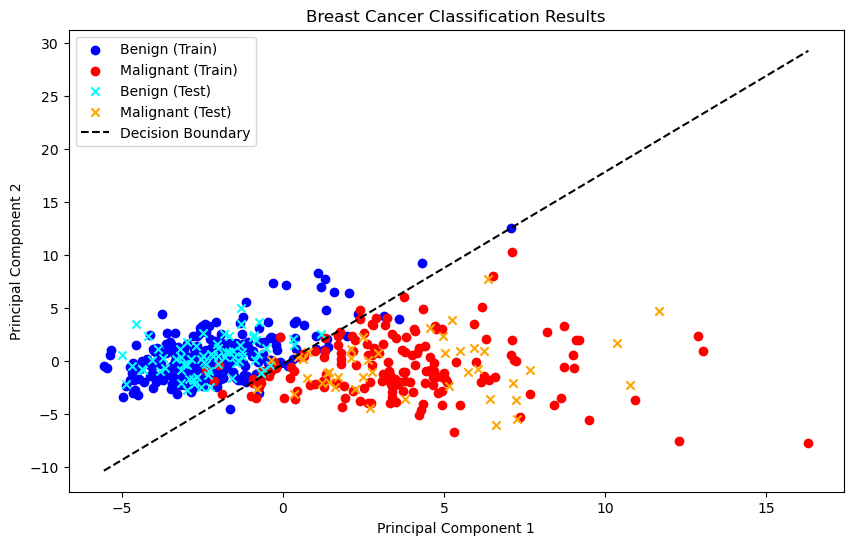

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 加载乳腺癌数据集
data = load_breast_cancer()
X = data.data.T  # 转置后，行表示特征(n)，列表示样本(m)
y = data.target.reshape(1, -1)  # 将标签转换为行向量

# 数据预处理 - 标准化
X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

# 划分训练集和测试集 (80%训练，20%测试)
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train = X_train.T  # 转置回原始格式
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# 初始化参数
n, m_train = X_train.shape
w = np.zeros((n, 1))  # 参数向量
b = 0  # 偏置项
learning_rate = 0.1
iterations = 2000
cost_history = []
accuracy_history = []

# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 梯度下降训练
for i in range(iterations):
    # 前向传播
    z = np.dot(w.T, X_train) + b
    yhat = sigmoid(z)
    
    # 计算损失 (交叉熵损失)
    cost = -np.mean(y_train * np.log(yhat) + (1 - y_train) * np.log(1 - yhat))
    cost_history.append(cost)
    
    # 计算准确率
    predictions = (yhat > 0.5).astype(int)
    accuracy = np.mean(predictions == y_train)
    accuracy_history.append(accuracy)
    
    # 反向传播
    dz = yhat - y_train
    dw = np.dot(X_train, dz.T) / m_train
    db = np.sum(dz) / m_train
    
    # 更新参数
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # 每100次迭代打印一次损失
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

# 绘制训练过程
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Training Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# 在测试集上评估
z_test = np.dot(w.T, X_test) + b
yhat_test = sigmoid(z_test)
predictions_test = (yhat_test > 0.5).astype(int)
test_accuracy = np.mean(predictions_test == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 绘制二分结果
plt.figure(figsize=(10, 6))

# 由于有多个特征，我们选择前两个主成分进行可视化
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T).T

# 重新划分训练集和测试集的PCA结果
X_train_pca, X_test_pca = pca.transform(X_train.T).T, pca.transform(X_test.T).T

# 绘制训练集
plt.scatter(X_train_pca[0, y_train[0] == 1], X_train_pca[1, y_train[0] == 1], color='blue', label='Benign (Train)')
plt.scatter(X_train_pca[0, y_train[0] == 0], X_train_pca[1, y_train[0] == 0], color='red', label='Malignant (Train)')

# 绘制测试集
plt.scatter(X_test_pca[0, y_test[0] == 1], X_test_pca[1, y_test[0] == 1], color='cyan', label='Benign (Test)', marker='x')
plt.scatter(X_test_pca[0, y_test[0] == 0], X_test_pca[1, y_test[0] == 0], color='orange', label='Malignant (Test)', marker='x')

# 绘制决策边界
x_boundary = np.array([np.min(X_pca[0]), np.max(X_pca[0])])
# 由于我们进行了PCA，需要将决策边界投影到PCA空间
# 这是一个近似，因为PCA改变了特征空间
w_pca = pca.components_ @ w
y_boundary = (-w_pca[0] * x_boundary - b) / w_pca[1]
plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

plt.title('Breast Cancer Classification Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()